# Exploratory Data Analysis on Cryptocurrency (**BITCOIN**)


# ***Import Main Libraries and Modules for Analysis***

In [292]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import random
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
#men8er inline bey7ot el visualization fy window gedyda

# **Setup The Data**

In [293]:

df = pd.read_csv('bitcoin.csv')
df.head()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Bitcoin,BTC,2013-04-29 23:59:59,147.488007,134.000000,134.444,144.539993,0.0,1.603769e+09
1,2,Bitcoin,BTC,2013-04-30 23:59:59,146.929993,134.050003,144.000,139.000000,0.0,1.542813e+09
2,3,Bitcoin,BTC,2013-05-01 23:59:59,139.889999,107.720001,139.000,116.989998,0.0,1.298955e+09
3,4,Bitcoin,BTC,2013-05-02 23:59:59,NaN,92.281898,NaN,105.209999,0.0,1.168517e+09
4,5,Bitcoin,BTC,2013-05-03 23:59:59,NaN,79.099998,NaN,97.750000,0.0,1.085995e+09


In [294]:
print('Dataset Shape:', df.shape)
print('Number of Features: ',len(df.columns))

Dataset Shape: (2991, 10)
Number of Features:  9


# **1.Data Cleaning**

**1.1 Check for Duplicated Values**

In [295]:
df.duplicated().sum()

0

**1.2 Check for Null Values**

In [296]:
df.isna().sum()

SNo            0
Name           0
Symbol         0
Date           0
High         127
Low            0
Open         156
Close          0
Volume         0
Marketcap      0
dtype: int64

In [297]:
df['High'] = df['High'].fillna(df['High'].median())
df['Open'] = df['Open'].fillna(df['Open'].median())
df

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Bitcoin,BTC,2013-04-29 23:59:59,147.488007,134.000000,134.444000,144.539993,0.000000e+00,1.603769e+09
1,2,Bitcoin,BTC,2013-04-30 23:59:59,146.929993,134.050003,144.000000,139.000000,0.000000e+00,1.542813e+09
2,3,Bitcoin,BTC,2013-05-01 23:59:59,139.889999,107.720001,139.000000,116.989998,0.000000e+00,1.298955e+09
3,4,Bitcoin,BTC,2013-05-02 23:59:59,3137.643870,92.281898,3421.458373,105.209999,0.000000e+00,1.168517e+09
4,5,Bitcoin,BTC,2013-05-03 23:59:59,3137.643870,79.099998,3421.458373,97.750000,0.000000e+00,1.085995e+09
...,...,...,...,...,...,...,...,...,...,...
2986,2987,Bitcoin,BTC,2021-07-02 23:59:59,33939.588699,32770.680780,33549.600177,33897.048590,3.872897e+10,6.354508e+11
2987,2988,Bitcoin,BTC,2021-07-03 23:59:59,34909.259899,33402.696536,33854.421362,34668.548402,2.438396e+10,6.499397e+11
2988,2989,Bitcoin,BTC,2021-07-04 23:59:59,35937.567147,34396.477458,34665.564866,35287.779766,2.492431e+10,6.615748e+11
2989,2990,Bitcoin,BTC,2021-07-05 23:59:59,35284.344430,33213.661034,35284.344430,33746.002456,2.672155e+10,6.326962e+11


# **2.Exploratory Data Analysis**

**2.1 Dispaly Types oF Variables**

In [298]:
#Check for continuous variables
# cont=df._get_numeric_data().columns
# print("The continuous variables are: ",list(cont))
# #Check for categorical variables
# print("The categorical variables are: ",list(set(df.columns) - set(cont)))
df.dtypes

SNo            int64
Name          object
Symbol        object
Date          object
High         float64
Low          float64
Open         float64
Close        float64
Volume       float64
Marketcap    float64
dtype: object

**2.2 Descriptive Statistics**

In [299]:
df.describe()

,SNo,High,Low,Open,Close,Volume,Marketcap
count,2991.000000,2991.000000,2991.000000,2991.000000,2991.000000,2.991000e+03,2.991000e+03
mean,1496.000000,7021.828108,6486.009539,6872.743028,6711.290443,1.090633e+10,1.208761e+11
std,863.571653,11583.801079,10869.032130,11211.003929,11298.141921,1.888895e+10,2.109438e+11
min,1.000000,130.580002,65.526001,134.444000,68.431000,0.000000e+00,7.784112e+08
25%,748.500000,492.810501,422.879486,509.519501,430.569489,3.036725e+07,6.305579e+09
50%,1496.000000,3137.643870,2178.500000,3421.458373,2286.409912,9.460360e+08,3.741503e+10
75%,2243.500000,8733.926948,8289.800459,8569.656494,8576.238715,1.592015e+10,1.499957e+11
max,2991.000000,64863.098908,62208.964366,63523.754869,63503.457930,3.509679e+11,1.186364e+12


In [300]:
df=df.drop(columns=['Name','Symbol','SNo'])

In [301]:
df['Date'] = pd.to_datetime(df['Date'])
# df['Date'] = pd.to_numeric(df['Date'])
df = df.sort_values('Date')
df.dtypes

Date         datetime64[ns]
High                float64
Low                 float64
Open                float64
Close               float64
Volume              float64
Marketcap           float64
dtype: object

In [302]:
df.head()

,Date,High,Low,Open,Close,Volume,Marketcap
0,2013-04-29 23:59:59,147.488007,134.000000,134.444000,144.539993,0.0,1.603769e+09
1,2013-04-30 23:59:59,146.929993,134.050003,144.000000,139.000000,0.0,1.542813e+09
2,2013-05-01 23:59:59,139.889999,107.720001,139.000000,116.989998,0.0,1.298955e+09
3,2013-05-02 23:59:59,3137.643870,92.281898,3421.458373,105.209999,0.0,1.168517e+09
4,2013-05-03 23:59:59,3137.643870,79.099998,3421.458373,97.750000,0.0,1.085995e+09


In [303]:
df['Range'] = df['High'] - df['Low']

# **3.Data Visualization**

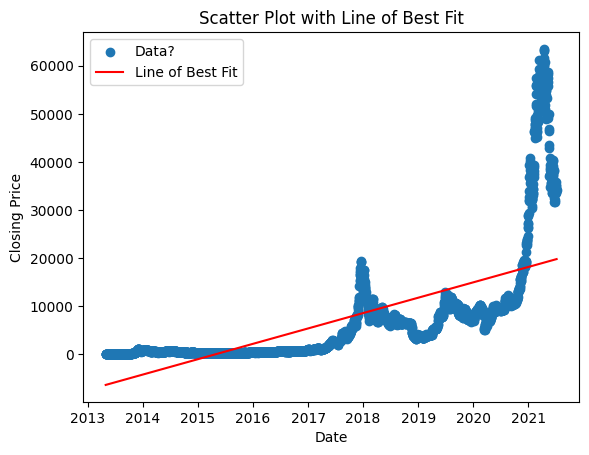

In [304]:
plt.scatter(df['Date'], df['Close'], label='Data?')
slope, intercept = np.polyfit(range(len(df['Date'])), df['Close'], 1)
line_of_best_fit = slope * np.arange(len(df['Date'])) + intercept
plt.plot(df['Date'], line_of_best_fit, color='red', label='Line of Best Fit')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Scatter Plot with Line of Best Fit')
plt.legend()

plt.show()

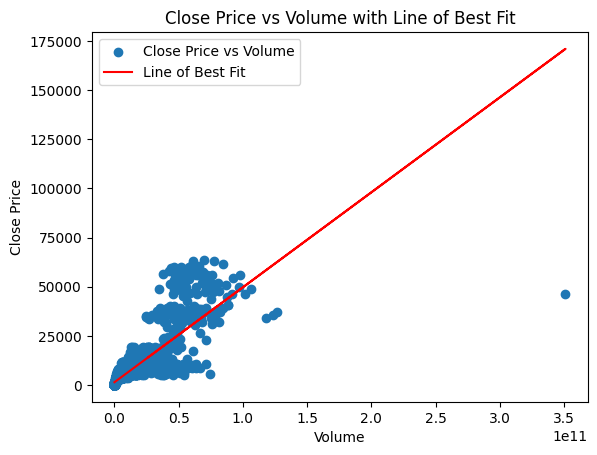

In [305]:
plt.scatter(df['Volume'], df['Close'], label='Close Price vs Volume')
slope, intercept = np.polyfit(df['Volume'], df['Close'], 1)
line_of_best_fit = slope * np.array(df['Volume']) + intercept
plt.plot(df['Volume'], line_of_best_fit, color='red', label='Line of Best Fit')
plt.xlabel('Volume')
plt.ylabel('Close Price')
plt.title('Close Price vs Volume with Line of Best Fit')
plt.legend()

plt.show()

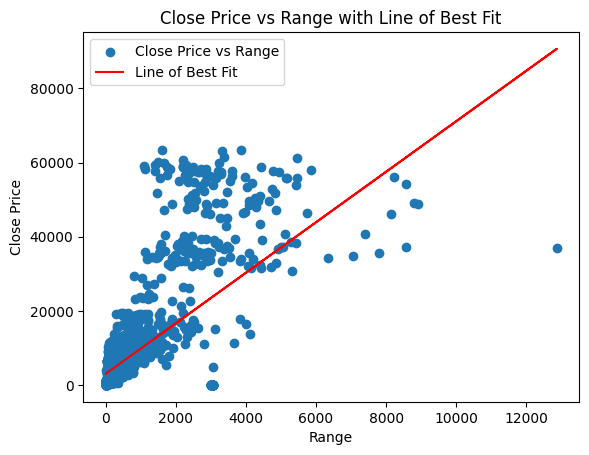

In [306]:
#range is high - low
plt.scatter(df['Range'], df['Close'], label='Close Price vs Range')
slope, intercept = np.polyfit(df['Range'], df['Close'], 1)
line_of_best_fit = slope * np.array(df['Range']) + intercept
plt.plot(df['Range'], line_of_best_fit, color='red', label='Line of Best Fit')
plt.xlabel('Range')
plt.ylabel('Close Price')
plt.title('Close Price vs Range with Line of Best Fit')
plt.legend()

plt.show()

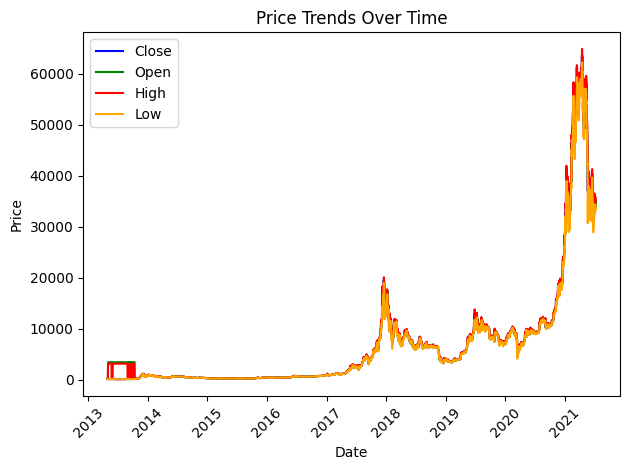

In [307]:
# line plot
plt.plot(df['Date'], df['Close'], label='Close', color='blue')
plt.plot(df['Date'], df['Open'], label='Open', color='green')
plt.plot(df['Date'], df['High'], label='High', color='red')
plt.plot(df['Date'], df['Low'], label='Low', color='orange')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Price Trends Over Time')
plt.legend()
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

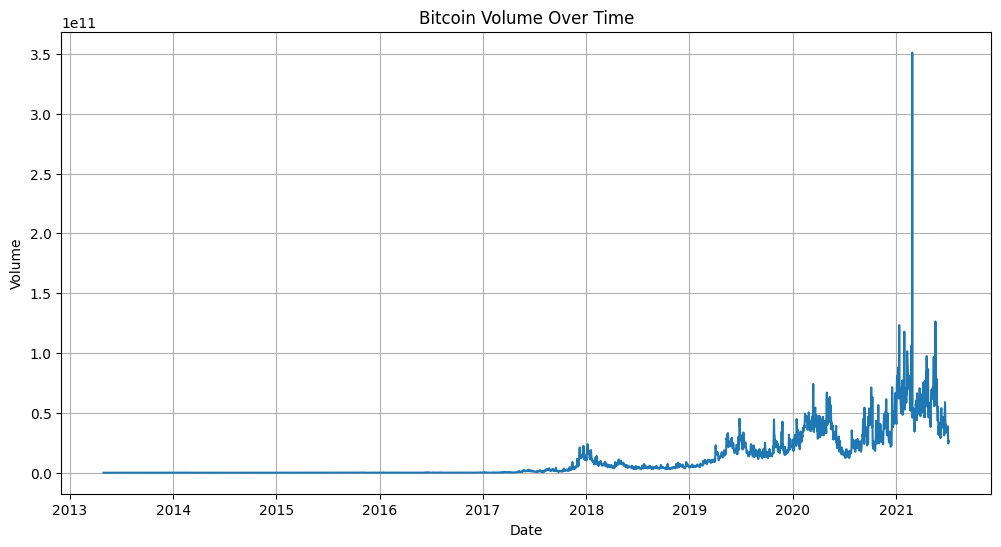

In [308]:
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Volume'])
plt.title('Bitcoin Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.grid(True)
plt.show()

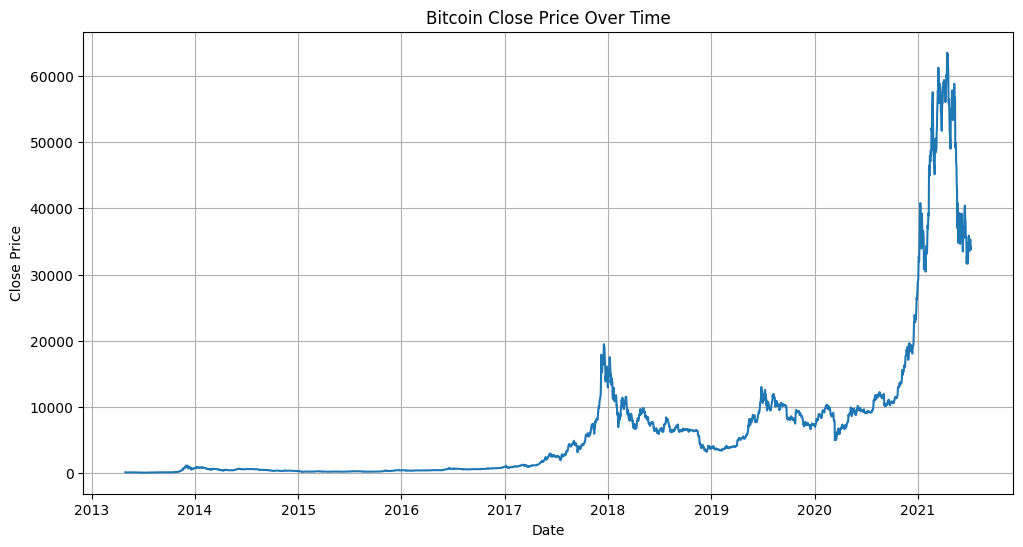

In [309]:
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'])
plt.title('Bitcoin Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.grid(True)
plt.show()

# 4.**Correlations**

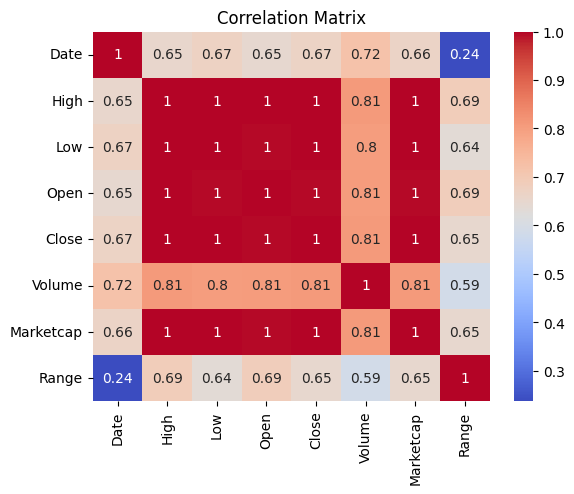

In [310]:
corr_matrix= df.corr()
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# **5.Linear Regression Model**

## **5.1 Splitting Data**

In [311]:
df.head()

,Date,High,Low,Open,Close,Volume,Marketcap,Range
0,2013-04-29 23:59:59,147.488007,134.000000,134.444000,144.539993,0.0,1.603769e+09,13.488007
1,2013-04-30 23:59:59,146.929993,134.050003,144.000000,139.000000,0.0,1.542813e+09,12.879990
2,2013-05-01 23:59:59,139.889999,107.720001,139.000000,116.989998,0.0,1.298955e+09,32.169998
3,2013-05-02 23:59:59,3137.643870,92.281898,3421.458373,105.209999,0.0,1.168517e+09,3045.361971
4,2013-05-03 23:59:59,3137.643870,79.099998,3421.458373,97.750000,0.0,1.085995e+09,3058.543871


In [312]:
df.set_index('Date', inplace=True)
x=df.drop(columns=['Close'])
y=df['Close']

In [313]:
x_train,x_test,y_train,y_test = train_test_split(x ,y,test_size = 0.2)

# **5.2 Visualizing The Linear Regression Model**

In [314]:
linReg = LinearRegression()
linReg.fit(x_train,y_train)
linReg_confidence = linReg.score(x_test , y_test)

In [315]:
linReg_prediction = linReg.predict(x_test)

In [346]:
linReg_prediction.reshape(-1,1)

array([[  347.77667349],
       [  667.82681042],
       [11292.84171701],
       [ 5792.07781391],
       [  403.62266715],
       [  412.33190147],
       [  457.16614765],
       [ 8216.25146528],
       [  788.8796383 ],
       [ 3973.28982193],
       [ 8992.19062271],
       [ 5196.79449884],
       [  374.25984667],
       [ 1056.8777327 ],
       [ 3309.25685621],
       [  370.79653018],
       [  618.60715337],
       [  659.41570221],
       [  762.51860352],
       [57793.91036987],
       [  385.34436014],
       [26392.05319469],
       [ 6208.88311864],
       [ 8624.95099903],
       [  544.46378399],
       [ 8523.1517937 ],
       [ 3916.05964492],
       [  969.15896123],
       [  634.2439571 ],
       [  498.26845225],
       [ 1195.04778941],
       [  378.33440437],
       [  666.83631725],
       [  430.24612731],
       [12672.1120802 ],
       [ 6928.28213771],
       [  697.99227065],
       [ 7267.43801265],
       [ 7608.44615122],
       [ 3849.02745448],


In [317]:
y_test

Date
2015-06-20 23:59:59      245.212006
2013-12-23 23:59:59      673.409973
2019-08-10 23:59:59    11354.024218
2018-06-28 23:59:59     5903.439941
2013-11-11 23:59:59      342.440002
                           ...     
2015-05-08 23:59:59      243.863007
2016-11-14 23:59:59      705.020996
2019-09-03 23:59:59    10623.540117
2020-04-07 23:59:59     7176.414500
2013-10-14 23:59:59      140.520004
Name: Close, Length: 599, dtype: float64

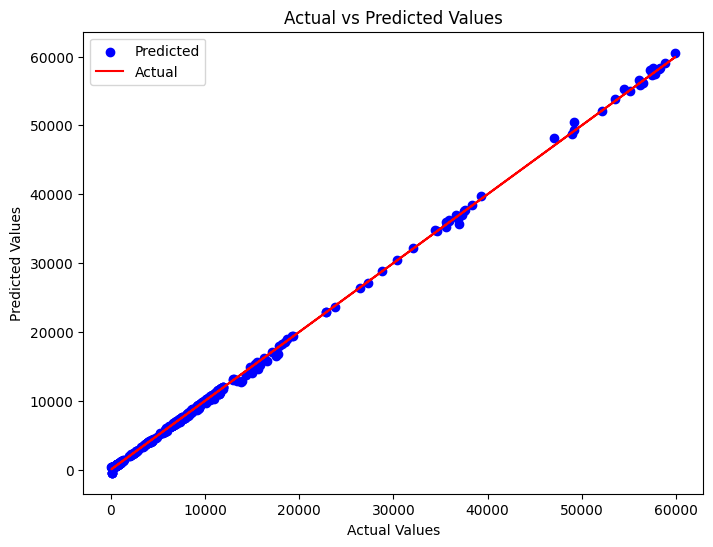

In [318]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, linReg_prediction, color='blue', label='Predicted')
plt.plot(y_test, y_test, color='red', label='Actual')
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

In [319]:
linReg_confidence = linReg.score(x_test , y_test)
print("Coefficient of determination (R^2):", linReg_confidence)

Coefficient of determination (R^2): 0.9996461602993884


In [320]:
from sklearn.metrics import mean_squared_error
linear_reg_rmse=np.sqrt(mean_squared_error(y_test, linReg_prediction))
print(linear_reg_rmse)

218.53446866959055


# 6. Another approach

# lstm

In [321]:
df.head()

,High,Low,Open,Close,Volume,Marketcap,Range
Date,,,,,,,
2013-04-29 23:59:59,147.488007,134.000000,134.444000,144.539993,0.0,1.603769e+09,13.488007
2013-04-30 23:59:59,146.929993,134.050003,144.000000,139.000000,0.0,1.542813e+09,12.879990
2013-05-01 23:59:59,139.889999,107.720001,139.000000,116.989998,0.0,1.298955e+09,32.169998
2013-05-02 23:59:59,3137.643870,92.281898,3421.458373,105.209999,0.0,1.168517e+09,3045.361971
2013-05-03 23:59:59,3137.643870,79.099998,3421.458373,97.750000,0.0,1.085995e+09,3058.543871


In [322]:
dff=df['Close']
dff.head()

Date
2013-04-29 23:59:59    144.539993
2013-04-30 23:59:59    139.000000
2013-05-01 23:59:59    116.989998
2013-05-02 23:59:59    105.209999
2013-05-03 23:59:59     97.750000
Name: Close, dtype: float64

In [323]:
dff=dff.values
dff[0:5]

array([144.53999329, 139.        , 116.98999786, 105.20999908,
        97.75      ])

In [327]:
from sklearn.preprocessing import MinMaxScaler
dff=dff.astype('float32')
scaler = MinMaxScaler(feature_range=(0, 1))
dff = scaler.fit_transform(dff.reshape(-1,1))
train_size = int(len(dff) * 0.8)
train_data, test_data = dff[:train_size], dff[train_size:]

In [328]:
print(train_data[0:10])

[[0.00119979]
 [0.00111246]
 [0.00076549]
 [0.00057979]
 [0.00046219]
 [0.00069471]
 [0.00074847]
 [0.00069156]
 [0.00067895]
 [0.00071152]]


In [329]:
def to_sequences(dataset, seq_size=1):
    x = []
    y = []

    for i in range(len(dataset)-seq_size-1):
        # print(i)
        window = dataset[i:(i+seq_size), 0]
        # print("h")
        # print(window)
        x.append(window)
        y.append(dataset[i+seq_size, 0])

    return np.array(x),np.array(y)

In [330]:
seq_size = 10

trainX, trainY = to_sequences(train_data, seq_size)
testX, testY = to_sequences(test_data, seq_size)

In [331]:
trainX.shape

(2381, 10)

In [333]:
trainX

array([[0.00119979, 0.00111246, 0.00076549, ..., 0.00069156, 0.00067895,
        0.00071152],
       [0.00111246, 0.00076549, 0.00057979, ..., 0.00067895, 0.00071152,
        0.00069739],
       [0.00076549, 0.00057979, 0.00046219, ..., 0.00071152, 0.00069739,
        0.0007688 ],
       ...,
       [0.1459176 , 0.14450885, 0.14730318, ..., 0.13785997, 0.14167401,
        0.13698043],
       [0.14450885, 0.14730318, 0.14619835, ..., 0.14167401, 0.13698043,
        0.13789275],
       [0.14730318, 0.14619835, 0.14648765, ..., 0.13698043, 0.13789275,
        0.1377761 ]], dtype=float32)

In [334]:
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Flatten,ConvLSTM2D
trainX = trainX.reshape((trainX.shape[0], 1, 1, 1, seq_size))
testX = testX.reshape((testX.shape[0], 1, 1, 1, seq_size))

def create_lstm_model():
    model = Sequential()
    model.add(ConvLSTM2D(128, kernel_size=(1,1), input_shape=(1, 1, 1, 10)))
    model.add(Flatten())
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    model.summary()
    return model

lstm_model = create_lstm_model()
lstm_history = lstm_model.fit(trainX,
                              trainY,
                              validation_data=(testX,testY),
                              epochs=10, verbose=0)
lstm_predictions = lstm_model.predict(np.expand_dims(testX, axis=-1))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv_lstm2d (ConvLSTM2D)    (None, 1, 1, 128)         71168     
                                                                 
 flatten (Flatten)           (None, 128)               0         
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 71297 (278.50 KB)
Trainable params: 71297 (278.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
19/19 [==============================] - 0s 2ms/step


In [340]:
lstm_predictions

array([[0.11006317],
       [0.10933064],
       [0.11058246],
       [0.11158574],
       [0.11351575],
       [0.11414818],
       [0.11375262],
       [0.11271955],
       [0.11168198],
       [0.11087014],
       [0.11113201],
       [0.11205632],
       [0.11294511],
       [0.11361773],
       [0.11315426],
       [0.11214794],
       [0.11092536],
       [0.11015698],
       [0.10987841],
       [0.10915   ],
       [0.10874831],
       [0.10743398],
       [0.10507645],
       [0.10605604],
       [0.1068321 ],
       [0.10790506],
       [0.10833089],
       [0.10998296],
       [0.11074236],
       [0.11078274],
       [0.11046162],
       [0.11004768],
       [0.11009984],
       [0.11008035],
       [0.11074307],
       [0.11071471],
       [0.11017792],
       [0.10961734],
       [0.10821268],
       [0.10880812],
       [0.10970384],
       [0.11068122],
       [0.11298873],
       [0.11648227],
       [0.11897811],
       [0.11953378],
       [0.12078205],
       [0.121

In [341]:
testY.reshape(-1,1)

array([[0.11271281],
       [0.1176516 ],
       [0.11657085],
       [0.12127074],
       [0.11825011],
       [0.11595899],
       [0.11434624],
       [0.11431719],
       [0.11324348],
       [0.11633756],
       [0.11789332],
       [0.11803899],
       [0.1181668 ],
       [0.11559021],
       [0.1136547 ],
       [0.11269793],
       [0.11310318],
       [0.11352172],
       [0.11123575],
       [0.11167128],
       [0.10820598],
       [0.10360339],
       [0.11363393],
       [0.11246804],
       [0.11271983],
       [0.11228383],
       [0.11733514],
       [0.11487655],
       [0.11435482],
       [0.11360797],
       [0.11303748],
       [0.11384337],
       [0.11428322],
       [0.11593314],
       [0.1138892 ],
       [0.1123223 ],
       [0.11242595],
       [0.10904132],
       [0.11470718],
       [0.11574403],
       [0.11575444],
       [0.12139647],
       [0.127615  ],
       [0.1262935 ],
       [0.12312819],
       [0.12766013],
       [0.12562628],
       [0.128

In [343]:
from sklearn.metrics import r2_score
r2 = r2_score(testY, lstm_predictions)
print(r2)

0.9673528571908925


In [345]:
# lstm_rmse = np.sqrt(mean_squared_error(testY, lstm_predictions))
# linear_reg_rmse=np.sqrt(mean_squared_error(y_test, linReg_prediction))
# print(lstm_rmse)
# print(linear_reg_rmse)